## Extract words from local online community discussion

1. Visit reddit/r/singapore webpage using selenium
2. Choose 20 posts with most upvotes and 20 posts with most comments (if not in the former)
3. Extract out only the text of post (title, body) and text of comments
4. Filter out: stopwords 
5. Split text into individual words 
6. Count number of each word - WordCloud 
7. Present list as a chart


In [1]:

import time
from selenium import webdriver
from bs4 import BeautifulSoup

# Visit reddit.com/r/singapore home page using selenium
# To obtain links to each post

driver = webdriver.Chrome()

def getsoup(url):     
    driver.get(url)
    time.sleep(2)
    data = driver.page_source
    driver.close()
  
    soup = BeautifulSoup(data, "html.parser")
    return soup

url = "https://www.reddit.com/r/singapore/top"
# /top sorts the posts on the reddit singapore home page by most upvoted
# if this program is repeated regularly, sort by New may be more appropriate

soup = getsoup(url)

# Get all hrefs from home page using bs4 

posts = soup.find_all('a', {'data-click-id': 'body'})

urls = []
for post in posts:
    current_url = post.get("href")
    urls.append( "https://www.reddit.com" + current_url + "?sort=confidence")

print(*urls,sep="\n")

# Go to one post's page using selenium, get data using bs4

driver = webdriver.Chrome()

first_page = urls[0]
first_page_data = getsoup(first_page)

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

# Remove all stuff after the button "More posts from the singapore community" - these relate to other posts

result = first_page_data.prettify().splitlines()

list1 = []

for r in result:
    list1.append(r)

def cut_soup(list_a):
    for string in list_a:
        if "More posts from the" in string:
            return (" ".join(list_a[0:((list_a.index(string))+1)])) 
            break

cleanresults = cut_soup(list1)

# Convert the cleaned post into bs4 object

clean_results = BeautifulSoup(cleanresults)

# Getting only the text 

p_text = clean_results.find_all(['p','h1'])
p_text = p_text[1:]  # removes the duplicate of the original post's content

https://www.reddit.com/r/singapore/comments/clvjph/did_anyone_else_have_these_as_a_kid_i_just/?sort=confidence
https://www.reddit.com/r/singapore/comments/clwlr8/cursed/?sort=confidence
https://www.reddit.com/r/singapore/comments/clsehl/last_day_of_operations_for_public_busses_bearing/?sort=confidence
https://www.reddit.com/r/singapore/comments/clsack/the_abandoned_sports_complex_at_turnhouse_road/?sort=confidence
https://www.reddit.com/r/AbandonedPorn/comments/bstie3/the_abandoned_sports_complex_at_turnhouse_road/?sort=confidence
https://www.reddit.com/r/singapore/comments/clth96/does_sg_have_a_risk_control_plan_for_global/?sort=confidence
https://www.reddit.com/r/singapore/comments/clueb4/met_a_terrible_liar_on_carousell/?sort=confidence
https://www.reddit.com/r/singapore/comments/cluxwa/it_saddens_me_to_see_how_tan_cheng_bock_has_lost/?sort=confidence
https://www.reddit.com/r/singapore/comments/clto5b/racial_harmony_via_racism_singaporean_video_essay/?sort=confidence
https://www.red

In [3]:
# testing on tenth page - getting only the text

driver = webdriver.Chrome()

tenth_page = urls[10]
tenth_page_data = getsoup(tenth_page)

result10 = tenth_page_data.prettify().splitlines()

list10 = []

for r in result10:
    list10.append(r)

def cut_soup(list_a):
    for string in list_a:
        if "More posts from the" in string:
            return (" ".join(list_a[0:((list_a.index(string))+1)])) 
            break

cleanresults10 = cut_soup(list10)
clean_results10 = BeautifulSoup(cleanresults10)

tenth_ptext = clean_results10.find_all(['p','h1'])
tenth_ptext = tenth_ptext[1:]  # removes the duplicate of the post content


In [2]:
# Append each word to a csv file

def append_to_csv(row):
    f1 = open("first_post_text.csv", "a", encoding='utf-8')
    csv_writer = csv.writer(f1)
    csv_writer.writerow([row])
    f1.close()

import string
    
for line in p_text:
    result_string = ''.join(line.findAll(text=True)) # take only the content of each result
    #     result_string = (result.contents[0])  # alternative way to take the content of each result
    
    split_words = result_string.split()  # split each string into individual words 

    for word in split_words:
        append_to_csv(word.strip(string.punctuation)) # append each word into csv file, remove punctuation


In [3]:
# stopwords list 

import nltk
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

# Add custom words to stopwords list

stop_words.extend(["reddit", "redditor", "subreddit", "singapore"])

# Add uppercase words to stop_words 

Stop_Words = []

for word in stop_words:
    Stop_Words.append(word.capitalize())

MyStopWords = stop_words + Stop_Words

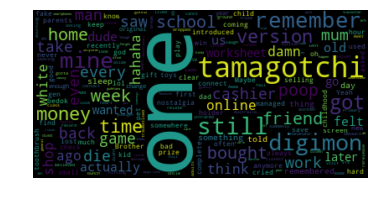

<Figure size 14400x14400 with 0 Axes>

In [4]:
! pip install wordcloud

from wordcloud import WordCloud

with open("first_post_text.csv") as f:
    redditwords = f.read().split()
    filtered_redditwords = []

for word in redditwords:
    if word not in MyStopWords:
        filtered_redditwords.append(word)
        
# write filtered_redditwords to csv file

with open("filtered_redditwords.csv", "w") as g:
    writer = csv.writer(g)
    for word in filtered_redditwords:
        writer.writerow([word])

text = open("filtered_redditwords.csv").read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image

image1 = plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(200,200))

wordcloud.to_file("firstpost.png")

In [5]:
# Display the csv file as dataframe

dct = {}

for word in text.split():
    dct[word] = text.split().count(word)

table1 = pd.DataFrame(list(dct.items()),columns=['word','wordcount'])

table1.sort_values("wordcount",ascending=False)

,word,wordcount
5,one,19
36,ones,10
32,still,10
86,tamagotchi,9
89,mine,9
74,could,9
9,remember,8
27,like,8
82,got,7
164,money,6
